<a href="https://colab.research.google.com/github/ybressler/Web-Scraping/blob/master/Web%20Scraping%20Overview%20%E2%80%93%20NYC%20Python%20Meetup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping – NYC Python Meetup

---


In [0]:
# These should all be installed. If they're not, pip install them by entering the following into a cell:
# !pip install <package name>

# Core python
import os
import json
import re
import datetime

# Web scraping
import requests
import urllib
from bs4 import BeautifulSoup 

# Basic Stuff

In [0]:
url = "https://www.meetup.com/nycpython/"

r = requests.get(url)
html = r.text
soup = BeautifulSoup(html, 'html.parser')


# Store all the things I'm scraping
records = {}

## Title

In [3]:
records = {}

# Try to find it in the soup
tag_name = "title" 

result = soup.head.find(tag_name)

if not result:
    result = soup.find("meta",  property=f"og:{tag_name}")
    result = result.get("content")
    
else:
    result = result.text

records.update(
    {tag_name: result}
)

print(records)

{'title': 'The New York Python Meetup Group (New York, NY) | Meetup'}


## Description

In [4]:
# Try to find it in the soup
tag_name = "description" 

result = soup.head.find(tag_name)

if not result:
    result = soup.find("meta",  property=f"og:{tag_name}")
    result = result.get("content")
    
else:
    result = result.text

records.update(
    {tag_name: result}
)
records

{'description': 'Meet other local Python Programming Language enthusiasts!',
 'title': 'The New York Python Meetup Group (New York, NY) | Meetup'}

## Some Creepy Stuff

In [0]:
new_relic_tracking = "nr-data.net"

In [6]:
creepy_script = "https://bam.nr-data.net/1/74dcd635da?a=153043785&amp;v=1167.2a4546b&amp;to=YlwAbEtRV0VWVBJQCVsWLFdLXVhaXk0DXTNHUE0CTEJVWFZaAw%3D%3D&amp;rst=6985&amp;ref=https://www.meetup.com/nycpython/&amp;ap=2389.297138&amp;be=2727&amp;fe=6932&amp;dc=3741&amp;tt=fe428349575618&amp;af=err,xhr,stn,ins,spa&amp;perf=%7B%22timing%22:%7B%22of%22:1581551747585,%22n%22:0,%22f%22:4,%22dn%22:6,%22dne%22:25,%22c%22:25,%22s%22:44,%22ce%22:75,%22rq%22:76,%22rp%22:2657,%22rpe%22:2706,%22dl%22:2669,%22di%22:3741,%22ds%22:3742,%22de%22:3742,%22dc%22:6932,%22l%22:6932,%22le%22:6957%7D,%22navigation%22:%7B%7D%7D&amp;fp=3216&amp;fcp=3216&amp;ja=%7B%22timeToAppInteractive%22:4221.2949999957345%7D&amp;jsonp=NREUM.setToken"
creepy_query = urllib.parse.urlparse(creepy_script).query
# creepy_query = urllib.parse.unquote(creepy_query)

creepy_all_stuff = urllib.parse.parse_qs(creepy_query)

creepy_perf = json.loads(creepy_all_stuff.get("perf", ["{}"])[0])
creepy_perf_timing = creepy_perf.get("timing", {}).get("of", None)
creepy_perf_timing_dt = datetime.datetime.fromtimestamp(creepy_perf_timing/1000) if creepy_perf_timing else None

creepy_perf_timing_dt

datetime.datetime(2020, 2, 12, 23, 55, 47, 585000)

In [7]:
pattern = re.compile(new_relic_tracking)

# Trying to find this:
soup.head.find_all(text=pattern)

['window.NREUM||(NREUM={});NREUM.info = {"agent":"","beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"74dcd635da","applicationID":"153043785","applicationTime":1377.227147,"transactionName":"YlwAbEtRV0VWVBJQCVsWLFdLXVhaXk0DXTNHUE0CTEJVWFZaAw==","queueTime":0,"ttGuid":"108fefeabf01200","agentToken":null}; (window.NREUM||(NREUM={})).loader_config={xpid:"VQQEWVFTCBABUVJSAwIAXlE=",licenseKey:"74dcd635da",applicationID:"153043785"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(25),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0

## Links and Stuff

In [0]:
all_links = soup.find_all("a")

records.update({"n_links":len(all_links)})


In [0]:
# We want the hrefs from the soup objects:
all_links_href = [x.get("href",None) for x in all_links]

In [10]:
# Get social media links
pattern = re.compile("(facebook|youtube|instagram|twitter|medium)")


for href in all_links_href:
    if len(pattern.findall(href))>0:
        account = pattern.findall(href)[0]
        records.update({account:href})
        
records

{'description': 'Meet other local Python Programming Language enthusiasts!',
 'facebook': 'https://www.facebook.com/meetup/',
 'instagram': 'https://www.instagram.com/meetup/',
 'medium': 'https://medium.com/meetup',
 'n_links': 69,
 'title': 'The New York Python Meetup Group (New York, NY) | Meetup',
 'twitter': 'https://twitter.com/Meetup/',
 'youtube': 'https://www.youtube.com/meetup'}

# To do: Scale

To do:

* compile all functions into a single function which ingests a url and spits out a record for the things.
* structure records into a pandas dataframe
* make a single data observation >> data visualization from your findings

We will do:
* find more creepy stuff!

# Yaakov – Get links to all Broadway Shows

## Define Functions

In [0]:
def get_soup(url):
  """
  Gets bs4 soup from url. No repeated variables.
  """
  r = requests.get(url)
  html = r.text
  soup = BeautifulSoup(html, 'html.parser')
  return soup

def get_key_for_url(url):
  """
  Returns the social attribute of a url (facebook, twitter etc)
  """
  pattern = re.compile("(facebook|youtube|instagram|twitter|medium)")

  if len(pattern.findall(url))>0:
      account = pattern.findall(url)[0]
  else:
    account = "website"
    
  return account



def get_title(soup, tag_name):
  """
  Get the title from a beautiful soup object
  """

  # Try to find it in the soup
  # tag_name = "title" 

  result = soup.head.find(tag_name)

  if not result:
      result = soup.find("meta",  property=f"og:{tag_name}")
      result = result.get("content") if result else None
      
  else:
      result = result.text

  return result


def who_made_this_website(soup):
  """
  Will tell you which broadway marketing company made this site
  """
  if soup.find("span",{"class":"serino"}):
    return "serino"
  else:
    return "na"

def find_n_buttons(soup):
  n_buttons = soup.find_all("div", {"class":re.compile(".*btn*.")})
  if n_buttons:
    return len(n_buttons)
  else:
   return 0

def find_n_calendar(soup):
  n_calendar = soup.find_all("table", {"class":re.compile(".*calendar*.")})
  if n_calendar:
    return len(n_calendar)
  else:
   return 0



import numpy as np

def get_words_and_chars(soup):
  """
  Returns the number of words, number of characters per page, and average characters per word
  """
  text = soup.body.get_text().splitlines()
  f_clean = lambda x: False if x.strip()=='' else True if not any(z in x for z in ['{', '}', '<']) else False
  lines = [x.strip() for x in text if f_clean(x)]
  all_text = '\n'.join(lines).split()

  n_words = len(all_text)
  n_chars = len(' '.join(lines))
  chars_per_word = [len(x) for x in lines]
  avg_chars_per_word = np.mean(chars_per_word)
  return n_words, n_chars, avg_chars_per_word

## DO Some Stuff

In [0]:
url = "http://www.playbill.com/productions"

r = requests.get(url)
html = r.text
soup = BeautifulSoup(html, 'html.parser')

In [0]:
# get all links
all_links = [x.get("href",None) for x in soup.find_all("a")]

# Get all shows
all_shows = list({"http://www.playbill.com"+x for x in all_links if "production/" in str(x)})

In [0]:
show_records = []
for url in all_shows:
  # Get the content for each page
  soup = get_soup(url)
  show_name = soup.find("h2", {"class":"bsp-bio-title "}).text
  s_all_links = soup.find_all("a", {"class":"bsp-bio-social-link"})
  s_all_links = [x.get("href",None) for x in s_all_links]

  # Save
  rec = {"show name":show_name}

  # Get url types
  for href in s_all_links:
    href_key = get_key_for_url(href)
    rec[href_key] = href

  
  show_records.append(rec)

In [0]:
# If you wanted a df
import pandas as pd
df = pd.DataFrame.from_records(show_records)

# If you wanted to work with raw
# show_urls = [{x.get("show name"):x.get("website")} for x in show_records]

## Go to Site and Find Stuff

In [16]:
records = []

i = 0
for s_name, s_url in df[["show name","website"]].dropna().values:
  soup = get_soup(s_url)
  if soup.title.text =="403 Forbidden":
    print(f"not able to scrape {s_url}")
    continue

  title = get_title(soup, "title")
  desc = get_title(soup, "description")
  website_by = who_made_this_website(soup)

  # Technical stuff:
  n_buttons = find_n_buttons(soup)
  n_calendars = find_n_calendar(soup)

  n_images = len(soup.find_all("img"))

  # Words and stuff
  n_words, n_chars, avg_chars_per_word = get_words_and_chars(soup)

  rec = {
      "show name":s_name,
      "website title":title,
      "website description":desc,
      "website by":website_by,
      "n_buttons":n_buttons,
      "n_calendars":n_calendars,
      "n_images":n_images,
      "n_words":n_words,
      "n_chars":n_chars,
      "average chars per word":avg_chars_per_word

    }

  records.append(rec)

not able to scrape https://hangmenbroadway.com/
not able to scrape https://plazasuitebroadway.com
not able to scrape https://theinheritanceplay.com/
not able to scrape http://www.companymusical.com
not able to scrape http://hamiltonbroadway.com
not able to scrape http://chicagothemusical.com


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


not able to scrape https://mrsdoubtfirebroadway.com/
not able to scrape https://moulinrougemusical.com/
not able to scrape http://thephantomoftheopera.com
not able to scrape https://singstreet.com/


In [0]:
new_df = pd.DataFrame.from_records(records)

## The Fruit of My Labor

In [18]:
new_df.head(2)

,show name,website title,website description,website by,n_buttons,n_calendars,n_images,n_words,n_chars,average chars per word
0,"Harry Potter and the Cursed Child, Parts One a...",Harry Potter And The Cursed Child | Global Web...,The official global website for Harry Potter a...,na,0,0,17,83,720,24.750000
1,West Side Story,West Side Story on Broadway,West Side Story on Broadway. Previews begin De...,na,0,0,0,15,100,6.769231


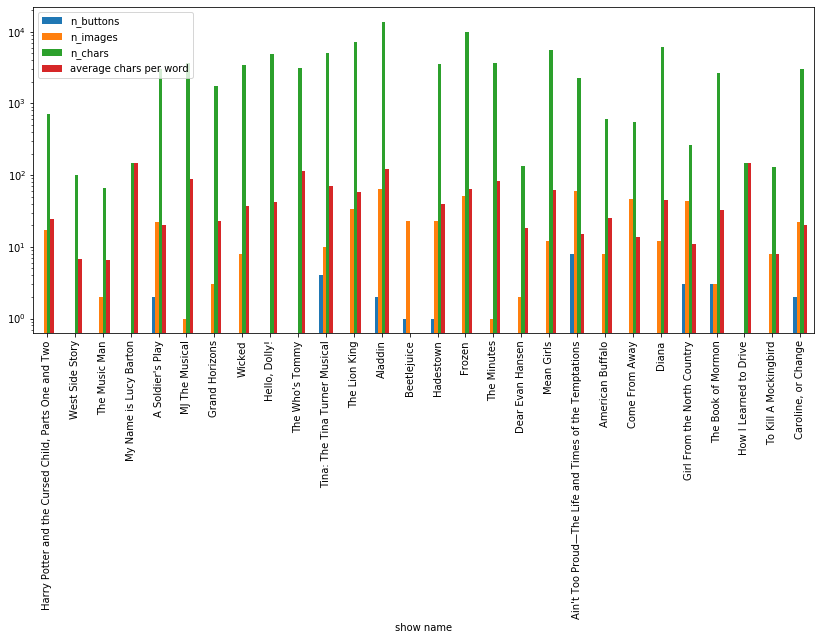

In [19]:
import matplotlib.pyplot as plt
new_df.plot(kind='bar', x='show name',y=['n_buttons', 'n_images','n_chars','average chars per word'], figsize=(14,6))
plt.yscale('log')
plt.show()

In [20]:
corr = new_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,n_buttons,n_calendars,n_images,n_words,n_chars,average chars per word
n_buttons,1,0.48,0.5,0.088,0.068,-0.17
n_calendars,0.48,1,0.27,0.31,0.1,-0.13
n_images,0.5,0.27,1,0.4,0.47,-0.11
n_words,0.088,0.31,0.4,1,0.93,0.2
n_chars,0.068,0.1,0.47,0.93,1,0.35
average chars per word,-0.17,-0.13,-0.11,0.2,0.35,1


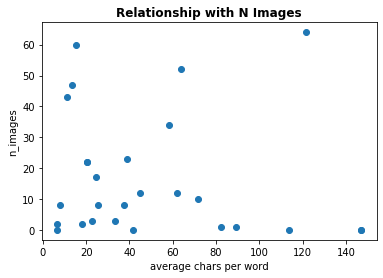

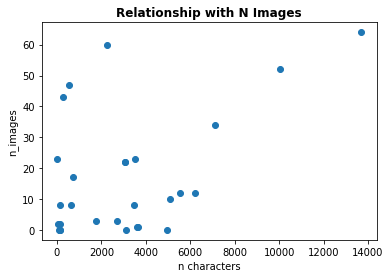

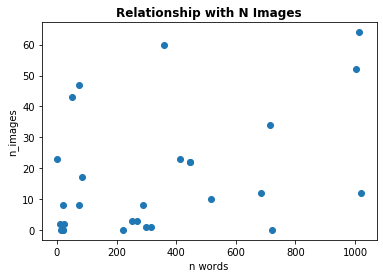

In [21]:
plt.scatter(data=new_df, x='average chars per word', y='n_images')
plt.title('Relationship with N Images', weight="bold")
plt.xlabel('average chars per word')
plt.ylabel('n_images')
plt.show()


plt.scatter(data=new_df, x='n_chars', y='n_images')
plt.title('Relationship with N Images', weight="bold")
plt.xlabel('n characters')
plt.ylabel('n_images')
plt.show()


plt.scatter(data=new_df, x='n_words', y='n_images')
plt.title('Relationship with N Images', weight="bold")
plt.xlabel('n words')
plt.ylabel('n_images')
plt.show()